In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
#PARÁMETROS FÍSICOS
L = 5.0
K = 0.02
S = 0
TA = 200
TB = 1000
#PARÁMETROS NUMÉRICOS
n = 4
h = L/(n+1)
#ctes
r = K/h**2

In [3]:
T = np.zeros(n+2) #vector de n+2 ceros
b = np.zeros(n) 
A = np.zeros((n,n))

In [4]:
#Colocando la temperatura en las fronteras
b[:] = S/r
T[0] = TA 
T[-1] = TB
b[0] += TA
b[-1] += TB

In [5]:
T, b, A

(array([ 200.,    0.,    0.,    0.,    0., 1000.]),
 array([ 200.,    0.,    0., 1000.]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]))

In [6]:
for i in range (0,n):
    A[i,i]=2
    for j in range(0,n-1):
        A[j,j+1]=-1
        A[j+1,j]=-1

print (A)

[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]


[ 200.  360.  520.  680.  840. 1000.]


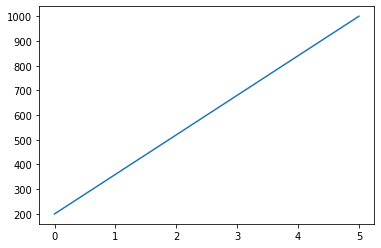

In [7]:
T[1:n+1] = np.linalg.solve(A,b)
print (T)
plt.plot(T)

In [12]:
#Todo en una celda
def conduc1d(K,S,L,TA,TB,n):
    
    """
    K: float
    Es la conductividad del material
    
    S: float
    Es la fuente
    
    L: float
    Es la longitud del dominio
    
    TA: float
    Es la condición de frontera izquiera.
    
    TB: float
    Es la condición de frontera derecha.
    
    n: int
    Es el número de nodos internos (grados de libertad).
    
    Return
    """
    
    h = L/(n+1)
    r = K/h**2
    
    T = np.zeros(n+2)
    b = np.zeros(n) 
    A = np.zeros((n,n))
    
    b[:] = S/r
    T[0] = TA 
    T[-1] = TB
    b[0] += TA
    b[-1] += TB
    for i in range (0,n):
        A[i,i]=2
        for j in range(0,n-1):
            A[j,j+1]=-1
            A[j+1,j]=-1

    T[1:n+1] = np.linalg.solve(A,b)
    plt.plot(T, 'o-') 

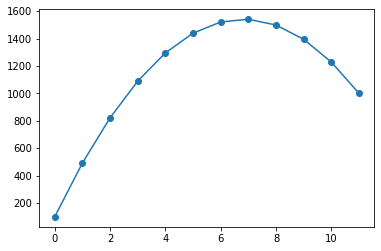

In [14]:
conduc1d(0.02,6,5.0,100,1000,10)

In [10]:
w = widgets.interactive(conduc1d,
                        K = widgets.fixed(0.02),
                        S = widgets.FloatSlider(max=10, min=0, value=5, step=0.2),
                        L = widgets.fixed(5.0),
                        TA = widgets.fixed(200),
                        TB = widgets.fixed(1000),
                        n = widgets.IntSlider(max=100, min=1, value=50))

In [11]:
w

interactive(children=(FloatSlider(value=5.0, description='S', max=10.0, step=0.2), IntSlider(value=50, descrip…